Importação de Bibliotecas

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling

Após tratamento prévio dos dados utilizando editor de planilhas a mesma foi importada para a variavel temporal

In [ ]:
temporal = pd.read_excel('ipca_202207SerieHist-pre-processado.xls')
temporal.head(10)

Tipos dos dados

In [ ]:
temporal.dtypes

Limpeza de linhas e células vazias
Prenchimento da ano para cada mês

In [4]:
df = pd.read_excel('ipca_202207SerieHist-pre-processado.xls')

temporal = df.dropna(how='all')

temporal = temporal.fillna(method="ffill")

print(temporal.to_string())

#temporal.to_excel("output.xlsx") 

        ANO  MES   INDICE  VARIACAO-MES  VARIACAO-3 VARIACAO-6  VARIACAO-ANO  VARIACAO-12
1    1994.0  JAN   141.31         41.31      162.13     533.33         41.31      2693.84
2    1994.0  FEV   198.22         40.27      171.24     568.17         98.22      3035.71
3    1994.0  MAR   282.96         42.75      182.96     602.93        182.96      3417.39
4    1994.0  ABR   403.73         42.68      185.71     648.92        303.73      3828.49
5    1994.0  MAI   581.49         44.03      193.36     695.71        481.49      4331.19
6    1994.0  JUN   857.29         47.43      202.97     757.29        757.29      4922.60
7    1994.0  JUL   915.93          6.84      126.87     548.17        815.93      4005.08
8    1994.0  AGO   932.97          1.86       60.44     370.67        832.97      3044.89
9    1994.0  SET   947.24          1.53       10.49     234.76        847.24      2253.15
10   1994.0  OUT   972.06          2.62        6.13     140.77        872.06      1703.17
11   1994.

Tipos dos dados após processamento

In [5]:
temporal.dtypes

ANO             float64
MES              object
INDICE          float64
VARIACAO-MES    float64
VARIACAO-3      float64
VARIACAO-6       object
VARIACAO-ANO    float64
VARIACAO-12     float64
dtype: object

In [6]:
temporal.shape

(345, 8)

Visualização detalhada do dataframe

In [7]:
pandas_profiling.ProfileReport(temporal)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Estatisicas da coluna indice 

In [8]:
temporal.describe().iloc[:, 1:2]

INDICE
count   345.000000
mean   3078.529188
std    1516.684863
min     141.310000
25%    1707.320000
50%    2810.360000
75%    4337.110000
max    6455.850000

In [9]:
# verificando dados ausentes
temporal.isnull().sum()

ANO             0
MES             0
INDICE          0
VARIACAO-MES    0
VARIACAO-3      0
VARIACAO-6      0
VARIACAO-ANO    0
VARIACAO-12     0
dtype: int64

In [10]:
# limpando colunas que não serão utilizadas
temporal = temporal.drop(columns=[
    "VARIACAO-MES",
              "VARIACAO-3",
              "VARIACAO-6",
              "VARIACAO-ANO",
              "VARIACAO-12",
    ]
)

In [11]:
temporal.head(10)

ANO  MES  INDICE
1   1994.0  JAN  141.31
2   1994.0  FEV  198.22
3   1994.0  MAR  282.96
4   1994.0  ABR  403.73
5   1994.0  MAI  581.49
6   1994.0  JUN  857.29
7   1994.0  JUL  915.93
8   1994.0  AGO  932.97
9   1994.0  SET  947.24
10  1994.0  OUT  972.06

In [12]:
#mudando os meses de object para date
temporal = temporal.replace(['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ'],['01-01','02-01','03-01','04-01','05-01','06-01','07-01','08-01','09-01','10-01','11-01','12-01'])

temporal.head(10)

ANO    MES  INDICE
1   1994.0  01-01  141.31
2   1994.0  02-01  198.22
3   1994.0  03-01  282.96
4   1994.0  04-01  403.73
5   1994.0  05-01  581.49
6   1994.0  06-01  857.29
7   1994.0  07-01  915.93
8   1994.0  08-01  932.97
9   1994.0  09-01  947.24
10  1994.0  10-01  972.06

In [13]:
#passando ano pra int
temporal = temporal.astype({"ANO":'int64'})
temporal = temporal.astype({"ANO":'string', "MES":'string'})
temporal.dtypes

ANO        string
MES        string
INDICE    float64
dtype: object

In [14]:
temporal['DATA'] = temporal['ANO'].str.cat(temporal['MES'], sep='-')
temporal.head(12)

ANO    MES   INDICE        DATA
1   1994  01-01   141.31  1994-01-01
2   1994  02-01   198.22  1994-02-01
3   1994  03-01   282.96  1994-03-01
4   1994  04-01   403.73  1994-04-01
5   1994  05-01   581.49  1994-05-01
6   1994  06-01   857.29  1994-06-01
7   1994  07-01   915.93  1994-07-01
8   1994  08-01   932.97  1994-08-01
9   1994  09-01   947.24  1994-09-01
10  1994  10-01   972.06  1994-10-01
11  1994  11-01   999.37  1994-11-01
12  1994  12-01  1016.46  1994-12-01

In [15]:
#tranformando coluna DATA em date 
temporal['DATA'] =  pd.to_datetime(temporal['DATA'], format=('%Y-%m-%d'))
temporal.dtypes

ANO               string
MES               string
INDICE           float64
DATA      datetime64[ns]
dtype: object

In [16]:
#limpando colunas ano e mes

temporal = temporal.drop(columns=[
        "ANO",
        "MES",
    ]
)


In [17]:
temporal.head(12)

INDICE       DATA
1    141.31 1994-01-01
2    198.22 1994-02-01
3    282.96 1994-03-01
4    403.73 1994-04-01
5    581.49 1994-05-01
6    857.29 1994-06-01
7    915.93 1994-07-01
8    932.97 1994-08-01
9    947.24 1994-09-01
10   972.06 1994-10-01
11   999.37 1994-11-01
12  1016.46 1994-12-01

Renomeando as colunas

In [18]:
df = pd.DataFrame({'ds':temporal.DATA, 'y':temporal.INDICE})

df.tail(12)

ds        y
361 2021-10-01  6018.51
362 2021-11-01  6075.69
363 2021-12-01  6120.04
365 2022-01-01  6153.09
366 2022-02-01  6215.24
367 2022-03-01  6315.93
368 2022-04-01  6382.88
369 2022-05-01  6412.88
370 2022-06-01  6455.85
371 2022-07-01  6411.95
372 2022-08-01  6388.87
387 2022-08-01  6388.87

In [29]:
#usando o split para criar os dados de teste e treino
X = pd.DataFrame({'ds':temporal.DATA})
y = pd.DataFrame({'y':temporal.INDICE})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
train = pd.DataFrame({'ds':X_train.ds,'y':y_train.y})

train

ds        y
17  1995-04-01  1086.24
7   1994-07-01   915.93
265 2014-05-01  3942.55
241 2012-07-01  3497.70
101 2001-10-01  1788.24
..         ...      ...
204 2009-09-01  2985.83
77  1999-12-01  1588.56
115 2002-11-01  1997.83
293 2016-07-01  4715.99
111 2002-07-01  1888.23

[231 rows x 2 columns]

In [31]:
test = pd.DataFrame({'ds':X_test.ds,'y':y_test.y})

test

ds        y
211 2010-03-01  3079.86
171 2007-02-01  2638.12
244 2012-10-01  3552.90
226 2011-05-01  3314.58
346 2020-08-01  5357.46
..         ...      ...
137 2004-07-01  2328.02
306 2017-07-01  4843.87
64  1998-12-01  1458.20
121 2003-04-01  2165.29
214 2010-06-01  3110.74

[114 rows x 2 columns]

Separação de teste e treino utilizando 75% para treino e 25% para teste

In [32]:
#mudar valores para esse modelo
#train = df[:247]
#test = df[:83]

#train
#test

Treino do modelo

In [33]:
from prophet import Prophet

model = Prophet(seasonality_mode = 'multiplicative')


In [34]:
model.fit(train)

21:04:57 - cmdstanpy - INFO - Chain [1] start processing
21:04:58 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
df_previsoes = pd.DataFrame({'ds': test['ds'].values})
df_previsoes

ds
0   2010-03-01
1   2007-02-01
2   2012-10-01
3   2011-05-01
4   2020-08-01
..         ...
109 2004-07-01
110 2017-07-01
111 1998-12-01
112 2003-04-01
113 2010-06-01

[114 rows x 1 columns]

In [36]:
pred = model.predict(df_previsoes)

Resultado da predição

In [37]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

ds         yhat   yhat_lower   yhat_upper
102 2019-12-01  5511.716967  5391.901097  5640.437273
103 2020-08-01  5684.654682  5561.713591  5812.855234
104 2020-09-01  5664.577381  5541.792602  5793.302818
105 2020-11-01  5685.221762  5568.000583  5799.706082
106 2021-01-01  5800.180735  5678.682541  5927.749865
107 2021-03-01  5817.864165  5692.392178  5937.035926
108 2021-06-01  5868.987490  5744.181638  5985.813954
109 2021-10-01  5864.496442  5740.110774  5983.627423
110 2021-11-01  5945.937478  5818.762537  6075.062917
111 2021-12-01  5949.377172  5834.040913  6081.707847
112 2022-02-01  5987.384788  5873.707608  6098.182437
113 2022-07-01  6061.267238  5939.490029  6187.717079

Gráfico de dirpersão gerado

Text(53.5, 0.5, 'IPCA')

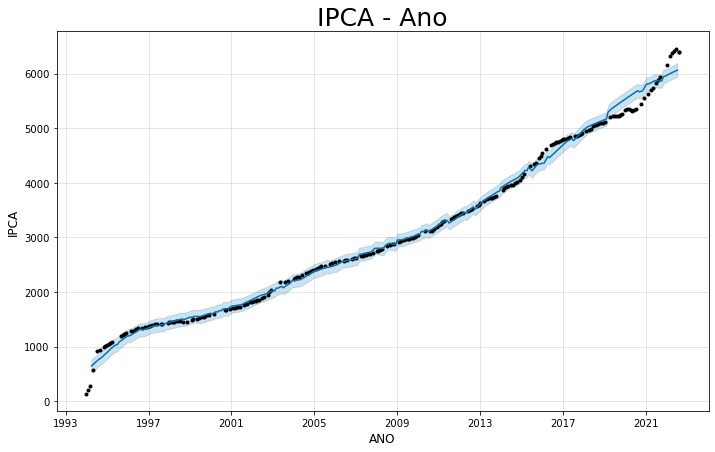

In [38]:
fig = model.plot(pred)
plt.title('IPCA - Ano',fontsize = 25)
plt.xlabel('ANO', fontsize = 12)
plt.ylabel('IPCA', fontsize = 12)

Gráfico de componentes

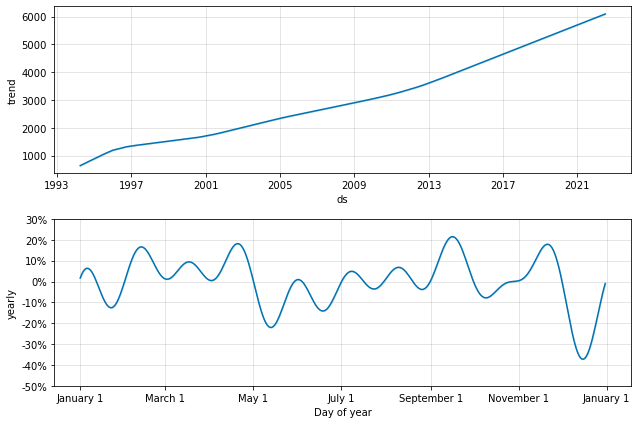

In [39]:
fig = model.plot_components(pred)

O modelo previu os valores com uma diferença de 

In [42]:
split_point = len(df)-114
validation = df[split_point:]

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(validation['y'], pred.yhat))
print('RMSE: %.3f' %rmse)

RMSE: 2097.985


Predição com todos os dados do dataset

In [43]:
model = Prophet(seasonality_mode = 'multiplicative')
model.fit(df)

21:05:58 - cmdstanpy - INFO - Chain [1] start processing
21:05:59 - cmdstanpy - INFO - Chain [1] done processing


Criação da tabela com os meses que serão previstos

In [44]:
futuro = model.make_future_dataframe(periods = 12, freq = 'MS')
futuro.tail(12)

ds
344 2022-09-01
345 2022-10-01
346 2022-11-01
347 2022-12-01
348 2023-01-01
349 2023-02-01
350 2023-03-01
351 2023-04-01
352 2023-05-01
353 2023-06-01
354 2023-07-01
355 2023-08-01

Analise da predição 

In [45]:
pred = model.predict(futuro)
pred[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

ds         yhat   yhat_lower   yhat_upper
344 2022-09-01  6119.359850  5995.906471  6234.380437
345 2022-10-01  6151.268366  6036.218566  6277.126695
346 2022-11-01  6181.011048  6063.027124  6287.093358
347 2022-12-01  6220.646416  6101.186967  6330.580985
348 2023-01-01  6245.345812  6131.684598  6362.064446
349 2023-02-01  6271.135062  6152.432701  6384.251843
350 2023-03-01  6316.878007  6198.031898  6434.103236
351 2023-04-01  6337.627356  6218.460380  6456.511874
352 2023-05-01  6355.462695  6244.928997  6470.731551
353 2023-06-01  6378.526526  6266.356293  6501.201222
354 2023-07-01  6388.164957  6270.299318  6504.878154
355 2023-08-01  6438.916875  6317.801808  6557.791547

In [46]:
pred['yhat'].tail(12).describe()

count      12.000000
mean     6283.695247
std       101.735673
min      6119.359850
25%      6210.737574
50%      6294.006534
75%      6361.228652
max      6438.916875
Name: yhat, dtype: float64

Text(53.5, 0.5, 'IPCA')

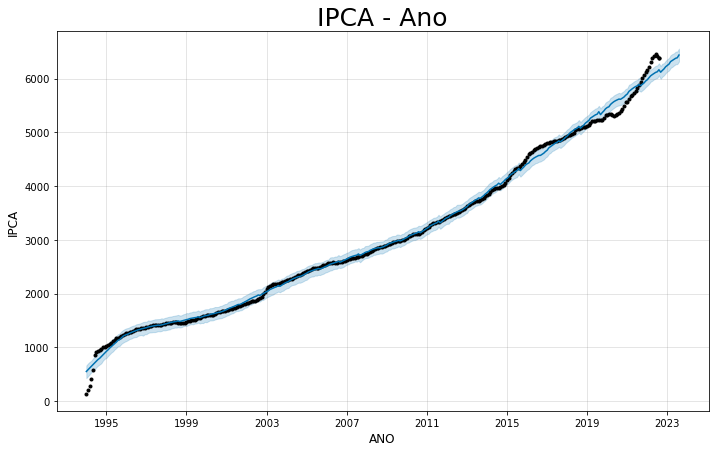

In [47]:
fig = model.plot(pred)
plt.title('IPCA - Ano',fontsize = 25)
plt.xlabel('ANO', fontsize = 12)
plt.ylabel('IPCA', fontsize = 12)

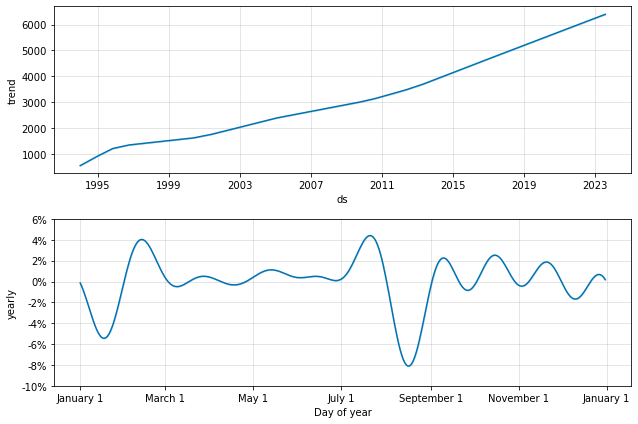

In [48]:
fig = model.plot_components(pred)